<a href="https://colab.research.google.com/github/mengji-dhanush/UNSUPERVISED_LEARNING/blob/main/UNSUPERVISED_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs()

In [7]:
k = 5
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(X) # learn the cluster(fit) and then assign label(predict)

In [11]:
y_pred

array([3, 0, 2, 1, 3, 2, 2, 2, 1, 4, 2, 1, 3, 0, 0, 3, 4, 0, 3, 0, 1, 4,
       2, 0, 4, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 4, 1, 0, 2, 3, 3, 0, 1, 4,
       2, 1, 2, 3, 2, 4, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 4,
       2, 2, 0, 1, 2, 2, 0, 3, 3, 2, 2, 3, 1, 0, 0, 2, 1, 0, 3, 4, 1, 1,
       0, 0, 1, 1, 4, 0, 4, 2, 4, 1, 1, 2], dtype=int32)

In [10]:
y_pred is kmeans.labels_

True

In [12]:
kmeans.cluster_centers_

array([[ 8.10302298,  7.96044955],
       [ 1.99431622, -5.63025788],
       [ 4.29693549,  7.56767172],
       [ 1.8077182 , -7.56519533],
       [ 9.85870356,  6.89330168]])

In [13]:
X

array([[ 2.62449381, -7.46676109],
       [ 7.66673659,  8.06964459],
       [ 4.68457954,  6.78166205],
       [ 4.93219722, -6.48247313],
       [ 2.14853264, -7.57420211],
       [ 3.80477428,  7.89748193],
       [ 4.93465369,  8.45253104],
       [ 4.071539  ,  8.58386395],
       [ 1.40860629, -4.84690577],
       [10.88359888,  7.15812287],
       [ 3.48431219,  7.99731785],
       [ 2.32965568, -4.68760499],
       [ 1.35408665, -7.70187139],
       [ 9.13472721,  7.72841265],
       [ 8.67294828,  7.21712449],
       [ 1.86397055, -7.36354178],
       [ 9.70990041,  6.85122694],
       [ 7.91225792,  7.50536146],
       [ 2.29505805, -8.87909503],
       [ 9.42810298,  9.44484536],
       [ 2.13001785, -5.34837388],
       [ 9.51257263,  7.0732494 ],
       [ 4.35276321,  8.89880793],
       [ 7.54645542,  7.90568182],
       [ 9.71795546,  6.30953044],
       [ 5.17124282,  8.0089208 ],
       [ 4.49632338,  7.9589421 ],
       [ 1.76986591, -6.11829461],
       [ 3.23668532,

In [15]:
import numpy as np
X_new=np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([2, 2, 2, 2], dtype=int32)

***Voronoi Tessellation***

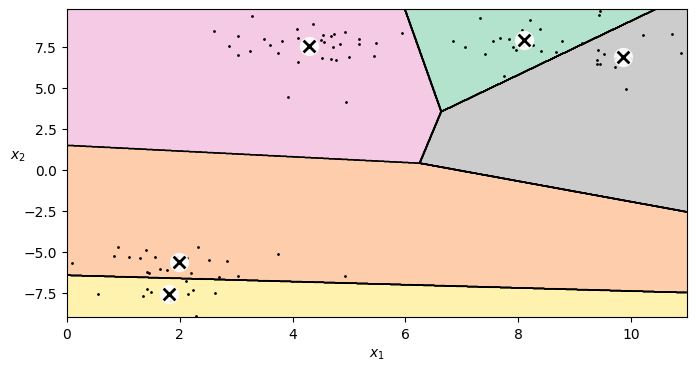

In [17]:
# Voronoi Tessellation

import matplotlib.pyplot as plt

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [19]:
kmeans.transform(X_new).round(2)

array([[10.06,  7.89,  7.03,  9.73, 11.01],
       [ 7.85,  7.7 ,  5.72,  9.64,  8.43],
       [12.16,  9.97,  8.61, 11.61, 13.44],
       [12.37,  9.54,  8.88, 11.15, 13.59]])

In [20]:
good_init=np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans=KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [21]:
kmeans.inertia_

150.4012742074673

In [23]:
kmeans.score(X)

-150.4012742074673

In [26]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans=MiniBatchKMeans(n_clusters=5,random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

np.float64(0.6085948375172852)